## Algorithmic Trading

#### Deep Neural Networks & Deep Learning for StockMarket Prediction

### Some Imports

In [1]:
import math
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('ggplot')
from pandas_datareader import data as web
%matplotlib inline

### Simple Examples

### Base Data

In [2]:
np.random.seed(100)

In [3]:
i = np.sort(np.random.random(10) * 10).round(2)
i

array([ 0.05,  1.22,  1.37,  2.78,  4.25,  5.43,  5.75,  6.71,  8.26,  8.45])

In [4]:
o = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

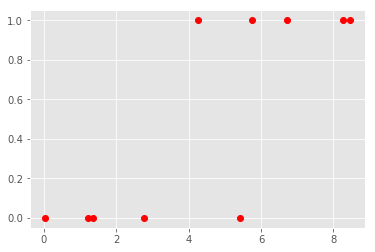

In [5]:
plt.plot(i,o,'ro');

## TensorFlow

In [6]:
import tensorflow as tf

In [7]:
tf.logging.set_verbosity(tf.logging.ERROR)

### Features and labels

In [8]:
fc = tf.contrib.layers.real_valued_column('i', dimension=1)

In [9]:
def get_data():
    fc = {'i': tf.constant(i)}
    la = tf.constant(o, shape=[len(o), 1])
    return fc, la

In [10]:
f, l = get_data()

In [11]:
f

{'i': <tf.Tensor 'Const:0' shape=(10,) dtype=float64>}

In [12]:
l

<tf.Tensor 'Const_1:0' shape=(10, 1) dtype=int64>

In [13]:
f

{'i': <tf.Tensor 'Const:0' shape=(10,) dtype=float64>}

In [14]:
l

<tf.Tensor 'Const_1:0' shape=(10, 1) dtype=int64>

In [15]:
tf.InteractiveSession()

In [16]:
f['i'].eval()

array([ 0.05,  1.22,  1.37,  2.78,  4.25,  5.43,  5.75,  6.71,  8.26,  8.45])

In [17]:
l.eval()

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

#### deep neural network classifier

In [18]:
dnn = tf.contrib.learn.DNNClassifier(hidden_units=[50], feature_columns=[fc])

In [19]:
dnn.fit(input_fn=get_data, steps=50)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f43e691af60>, 'hidden_units': [50], 'feature_columns': (_RealValuedColumn(column_name='i', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f43efb9ebf8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [20]:
d = list(dnn.predict(input_fn=get_data))
d

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [21]:
list(dnn.predict_proba(input_fn=get_data))

[array([ 0.76953846,  0.23046151], dtype=float32),
 array([ 0.75554913,  0.24445093], dtype=float32),
 array([ 0.74193203,  0.25806797], dtype=float32),
 array([ 0.58998436,  0.41001567], dtype=float32),
 array([ 0.41151991,  0.58848017], dtype=float32),
 array([ 0.28152314,  0.71847683], dtype=float32),
 array([ 0.25086603,  0.749134  ], dtype=float32),
 array([ 0.17289621,  0.82710385], dtype=float32),
 array([ 0.0889847 ,  0.91101533], dtype=float32),
 array([ 0.08170814,  0.91829187], dtype=float32)]

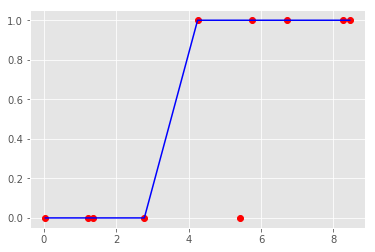

In [22]:
plt.plot(i, o, 'ro')
plt.plot(i, d, 'b');

In [23]:
dnn.evaluate(input_fn=get_data, steps=1)

{'accuracy': 0.89999998,
 'accuracy/baseline_label_mean': 0.5,
 'accuracy/threshold_0.500000_mean': 0.89999998,
 'auc': 0.9599998,
 'global_step': 50,
 'labels/actual_label_mean': 0.5,
 'labels/prediction_mean': 0.58554977,
 'loss': 0.38232827,
 'precision/positive_threshold_0.500000_mean': 0.83333331,
 'recall/positive_threshold_0.500000_mean': 1.0}

### buckatized coulumns

In [24]:
fcb = tf.contrib.layers.bucketized_column(fc, boundaries=[5])

In [25]:
model = tf.contrib.learn.DNNClassifier(hidden_units=[50], feature_columns=[fcb])

In [26]:
model.fit(input_fn=get_data, steps=50)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f43dffaf748>, 'hidden_units': [50], 'feature_columns': (_BucketizedColumn(source_column=_RealValuedColumn(column_name='i', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), boundaries=(5,)),), 'optimizer': None, 'activation_fn': <function relu at 0x7f43efb9ebf8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

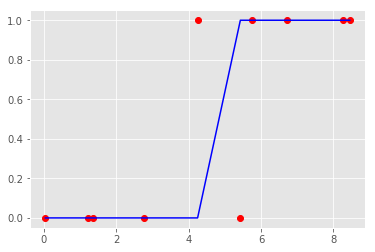

In [27]:
plt.plot(i, o, 'ro');
plt.plot(i, list(model.predict(input_fn=get_data)), 'b');

## Working with Real Financial Data

### Preparing Data

In [47]:
data = pd.DataFrame(web.DataReader('IST:GARAN', data_source='google')['Close'])
data.columns = ['prices']

In [48]:
data['log_rets'] = np.log(data['prices'] / data['prices'].shift(1))
data.dropna(inplace=True)
data['returns'] = np.where(data['log_rets'] > 0, 1, 0)

In [49]:
lags = 10
cols = []
for lag in range(1, lags+1):
    col = 'lag_%d' % lag
    data[col] = data['log_rets'].shift(lag)
    cols.append(col)

In [50]:
data.head()

,prices,log_rets,returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,,
2010-01-05,6.40,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.50,0.015504,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.60,0.015267,1,0.015504,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.55,-0.007605,0,0.015267,0.015504,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,6.40,-0.023167,0,-0.007605,0.015267,0.015504,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data.dropna(inplace=True)

### DNN Classifier

In [52]:
fc = tf.contrib.layers.real_valued_column('lags', dimension=lags)

In [53]:
mean = data['log_rets'].mean()
std = data['log_rets'].std()

In [54]:
fcb = tf.contrib.layers.bucketized_column(fc, boundaries=[mean-std, mean-std/2,
                                                          mean, mean+std/2, mean+std])

In [55]:
def get_data():
    fc = {'lags': tf.constant(data[cols].values)}
    la = tf.constant(data['returns'].values, shape=[len(data), 1])
    return fc, la

In [56]:
model = tf.contrib.learn.DNNClassifier(hidden_units=[50], feature_columns=[fcb])

In [57]:
%time model.fit(input_fn=get_data, steps=100)

CPU times: user 1.65 s, sys: 36 ms, total: 1.69 s
Wall time: 1.69 s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f43dfc90240>, 'hidden_units': [50], 'feature_columns': (_BucketizedColumn(source_column=_RealValuedColumn(column_name='lags', dimension=10, default_value=None, dtype=tf.float32, normalizer=None), boundaries=(-0.021316644851190246, -0.010528807126865859, 0.00025903059745852514, 0.011046868321782911, 0.021834706046107294)),), 'optimizer': None, 'activation_fn': <function relu at 0x7f43efb9ebf8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [58]:
model.evaluate(input_fn=get_data, steps=1)

{'accuracy': 0.57264054,
 'accuracy/baseline_label_mean': 0.4793213,
 'accuracy/threshold_0.500000_mean': 0.57264054,
 'auc': 0.59913623,
 'global_step': 100,
 'labels/actual_label_mean': 0.4793213,
 'labels/prediction_mean': 0.4795787,
 'loss': 0.67714196,
 'precision/positive_threshold_0.500000_mean': 0.56960225,
 'recall/positive_threshold_0.500000_mean': 0.44358408}

In [59]:
pred = np.array(list(model.predict(input_fn=get_data)))

In [60]:
data['position'] = np.where(pred > 0, 1, -1)

In [61]:
data.head()

,prices,log_rets,returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,position
Date,,,,,,,,,,,,,,
2010-01-19,6.35,0.000000,0,0.015873,-0.023717,0.000000,0.007843,-0.007843,-0.023167,-0.007605,0.015267,0.015504,0.000000,1
2010-01-20,6.50,0.023347,1,0.000000,0.015873,-0.023717,0.000000,0.007843,-0.007843,-0.023167,-0.007605,0.015267,0.015504,1
2010-01-21,6.55,0.007663,1,0.023347,0.000000,0.015873,-0.023717,0.000000,0.007843,-0.007843,-0.023167,-0.007605,0.015267,1
2010-01-22,6.30,-0.038915,0,0.007663,0.023347,0.000000,0.015873,-0.023717,0.000000,0.007843,-0.007843,-0.023167,-0.007605,-1
2010-01-25,6.45,0.023530,1,-0.038915,0.007663,0.023347,0.000000,0.015873,-0.023717,0.000000,0.007843,-0.007843,-0.023167,-1


In [62]:
data['strategy'] = data['position'] * data['log_rets']

In [63]:
data['position'].value_counts()

-1    1182
 1     704
Name: position, dtype: int64

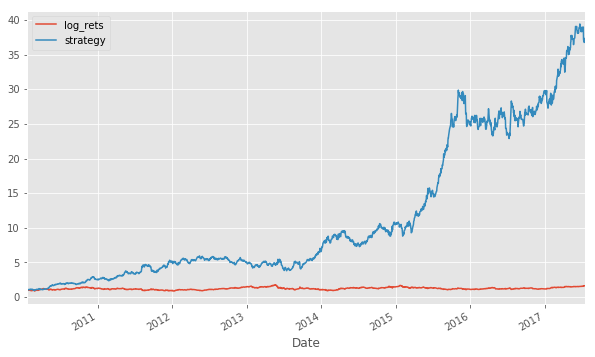

In [64]:
data[['log_rets', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));